# DeltaColorClip_IQR

Based on S. Allam's MagClip_Pandas.py code...

Created:  2020.10.01

## 1. Initial Setup...

In [1]:
import numpy as np
import pandas as pd
import glob
import math
import os

import matplotlib.pyplot as plt


%matplotlib inline

## 2. Input Files...

In [2]:
# Input files for FGCM mag_psf solution...
inputFile = 'ueberMasterList.1D_3D_MR.psf.csv'
inputFile_calspec = '../../CalSpec/test/Y6A1_FGCM_V3_3_1_PSF_ALL_STARS.full_match.new.mag_color.csv'
inputFile_narayan = '../../Narayan_G_2019_WDs/gnarayan-WDdata-b2daf1e/Y6A1_FGCM_V3_3_1_PSF_ALL_STARS.full_match.new.mag_color.des.csv'

# Input files for Y6A2 Coadd solution(s)...
#inputFile = 'ueberMasterList.1D_3D_MR.y6a2Coadd.csv'
#inputFile_calspec = '../../CalSpec/v2020-04-27/y6a2CoaddSummary_match_best_36arcsec.combined.csv'
#inputFile_narayan = '../../Narayan_G_2019_WDs/gnarayan-WDdata-b2daf1e/y6a2CoaddSummary_match_best_36arcsec.combined.des.csv

# Input files for FGCM mag_aper_8 solution...
#inputFile = 'ueberMasterList.1D_3D_MR.csv'
#inputFile_calspec = '../../CalSpec/test/Y6A1_FGCM_V2_1_2_2_ALL_STARS.full_match.new.mag_color.csv'
#inputFile_narayan = '../../Narayan_G_2019_WDs/gnarayan-WDdata-b2daf1e/Y6A1_FGCM_V2_1_2_2_ALL_STARS.full_match.new.mag_color.des.csv'


## 3.  Plotting Functions...

### Histogram function...

In [3]:
def histPlotCompare3(data_df, data_df_clean, data_df_cleaner, column_x, title, xlabel, xlo, xhi, nbins):
    plt.hist( x=data_df[column_x], bins=nbins, range=(xlo,xhi), color='red', label='pre-cut')
    plt.hist( x=data_df_clean[column_x], bins=nbins, range=(xlo,xhi), color='yellow', label='stat. outlier' )
    plt.hist( x=data_df_cleaner[column_x], bins=nbins, range=(xlo,xhi), color='green', label='good' )
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Number')
    return 0

### Main XY Plot Function...

In [4]:
def xyPlotCompare3(data_df, data_df_clean, data_df_cleaner, 
                   column_x, column_y, column_xerr, column_yerr, 
                   title, xlabel, ylabel, xlo, xhi, ylo, yhi, y_refvalue=0.00):
    plt.errorbar(data_df[column_x],data_df[column_y], \
                 xerr=data_df[column_xerr], yerr=data_df[column_yerr], \
                 fmt='.',color='red', ecolor='lightgray', elinewidth=3, capsize=0, label='pre-cut' )
    plt.errorbar(data_df_clean[column_x],data_df_clean[column_y], \
                 xerr=data_df_clean[column_xerr], yerr=data_df_clean[column_yerr], \
                 fmt='.',color='yellow', ecolor='yellow', elinewidth=3, capsize=0, label='stat. outlier' )
    plt.errorbar(data_df_cleaner[column_x],data_df_cleaner[column_y], \
                 xerr=data_df_cleaner[column_xerr], yerr=data_df_cleaner[column_yerr], \
                 fmt='.',color='green', ecolor='green', elinewidth=3, capsize=0, label='good' )
    plt.plot([xlo,xhi], [y_refvalue,y_refvalue], linestyle='dashed', label='mean')
    plt.xlim([xlo, xhi])
    plt.ylim([ylo, yhi])
    plt.grid(True)
    #plt.legend()
    plt.legend(loc='lower right')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return 0

### HST CalSpec XY Overplot Function...

In [5]:
def xyPlotOverplotCalSpec(calspec_df, column_x, column_y, column_xerr, column_yerr, ylo, yhi):
    
    plt.errorbar(calspec_df[column_x],calspec_df[column_y], \
                 xerr=calspec_df[column_xerr], yerr=calspec_df[column_yerr], \
                 fmt='.', color='blueviolet', ecolor='blueviolet', elinewidth=3, capsize=0, \
                 ms=15, label='HST CalSpec' )

    txt_array = calspec_df.objShortName.values
    x_array = calspec_df[column_x].values
    y_array = calspec_df[column_y].values
    #y2_array = np.full(len(txt_array), -0.07)
    
    for i, txt in enumerate(txt_array):
        
        yy = ylo + 0.20*(yhi-ylo)
        if txt == 'feige110':
            yy = yy + 0.05*(yhi-ylo)
    
        ax.annotate(txt, \
                    xy=(x_array[i], yy), \
                    color='blueviolet', ha='center')

        #ax.annotate(txt, \
        #            xy=(x_array[i], y_array[i]), \
        #            xytext=(x_array[i], y2_array[i]), \
        #            color='blueviolet', ha='center', \
        #            arrowprops=dict(arrowstyle="->", facecolor='blueviolet'))

       
        
    plt.legend(loc='lower right')

    return 0

### Narayan et al. (2019) DA White Dwarf XY Overplot Function...

In [6]:
def xyPlotOverplotNarayan(narayan_df, column_x, column_y, column_xerr, column_yerr, ylo, yhi):
    
    plt.errorbar(narayan_df[column_x],narayan_df[column_y], \
                 xerr=narayan_df[column_xerr], yerr=narayan_df[column_yerr], \
                 fmt='.', color='deepskyblue', ecolor='deepskyblue', elinewidth=3, capsize=0, \
                 ms=15, label='Narayan et al. (2019)' )

    txt_array = narayan_df.objShortName.values
    x_array = narayan_df[column_x].values
    y_array = narayan_df[column_y].values
    y2_array = np.full(len(txt_array), -0.13)
    
    for i, txt in enumerate(txt_array):

        #yy = -0.12 + 0.02*(i%2)
        yy = ylo + 0.10*(yhi-ylo)
        yy = yy + 0.05*(yhi-ylo)*(i%2)

        ax.annotate(txt, \
                    xy=(x_array[i], yy), \
                    color='deepskyblue', ha='center')

        #ax.annotate(txt, \
        #            xy=(x_array[i], y_array[i]), \
        #            xytext=(x_array[i], y2_array[i]), \
        #            color='deepskyblue', ha='center', \
        #            arrowprops=dict(arrowstyle="->", facecolor='deepskyblue'))

       
        
    plt.legend(loc='lower right')

    return 0

## 4. Read in  main input file...

In [7]:
data_df = pd.read_csv(inputFile)
data_df.head(5)

,set_obsRun_objShortName,model_set,model_dimen,preferred_model_dimen,dirname,filename,Teff,errT,logg,errg,...,MAGERR_STD_Y,NGOOD_G,NGOOD_R,NGOOD_I,NGOOD_Z,NGOOD_Y,sep_arcsec_fgcm,SFD98_EBV_max,R_sun_thick,R_sun_thin
0,1_???_SSSJ013843-8325,1,1,1,NaN,spSpec-SSSJ013843-8325.ms.fits,32387.0,1935.0,6.056,0.401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.144093,NaN,NaN
1,1_???_SSSJ033904-4037,1,1,1,NaN,spSpec-SSSJ033904-4037.ms.fits,29043.0,1563.0,6.536,0.289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011286,NaN,NaN
2,1_???_SSSJ040532-5055,1,1,1,NaN,spSpec-SSSJ040532-5055.ms.fits,18798.0,1634.0,7.692,0.283,...,0.000860,9.0,10.0,10.0,9.0,6.0,23.787608,0.013446,0.016107,0.015668
3,1_???_SSSJ041250-4510,1,1,0,NaN,spSpec-SSSJ041250-4510.ms.fits,12615.0,601.0,8.033,0.167,...,0.023812,7.0,7.0,11.0,6.0,1.0,16.119584,0.022683,0.012616,0.012402
4,1_???_SSSJ043704-5728,1,1,1,NaN,spSpec-SSSJ043704-5728.ms.fits,18519.0,846.0,8.145,0.146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010637,0.011775,0.011575


### Calculate observed FGCM colors from observed FGCM magnitudes...

In [8]:
data_df['gr_std'] = (data_df['MAG_STD_G'] - data_df['MAG_STD_R'])
data_df['ri_std'] = (data_df['MAG_STD_R'] - data_df['MAG_STD_I'])
data_df['iz_std'] = (data_df['MAG_STD_I'] - data_df['MAG_STD_Z'])
data_df['zY_std'] = (data_df['MAG_STD_Z'] - data_df['MAG_STD_Y'])

data_df['gi_std'] = (data_df['MAG_STD_G'] - data_df['MAG_STD_I'])

### Calculate statistical errrors for the observed FGCM colors...

In [9]:
data_df['gr_std_err']=np.sqrt(data_df['MAGERR_STD_G']*data_df['MAGERR_STD_G'] + \
                              data_df['MAGERR_STD_R']*data_df['MAGERR_STD_R'] )
data_df['ri_std_err']=np.sqrt(data_df['MAGERR_STD_R']*data_df['MAGERR_STD_R'] + \
                              data_df['MAGERR_STD_I']*data_df['MAGERR_STD_I'] )
data_df['iz_std_err']=np.sqrt(data_df['MAGERR_STD_I']*data_df['MAGERR_STD_I'] + \
                              data_df['MAGERR_STD_Z']*data_df['MAGERR_STD_Z'] )
data_df['zY_std_err']=np.sqrt(data_df['MAGERR_STD_Z']*data_df['MAGERR_STD_Z'] + \
                              data_df['MAGERR_STD_Y']*data_df['MAGERR_STD_Y'] )

data_df['gi_std_err']=np.sqrt(data_df['MAGERR_STD_G']*data_df['MAGERR_STD_G'] + \
                              data_df['MAGERR_STD_I']*data_df['MAGERR_STD_I'] )

### Calculate difference between the observed FGCM colors and the DES AB synthetic colors...

In [10]:
data_df['delta_STD_gr'] = data_df['gr_std'] - data_df['gr_1']
data_df['delta_STD_ri'] = data_df['ri_std'] - data_df['ri_1']
data_df['delta_STD_iz'] = data_df['iz_std'] - data_df['iz_1']
data_df['delta_STD_zY'] = data_df['zY_std'] - data_df['zY_1']

### Calculate DES AB synthetic (g-i) colors for best-fit model ("gi_1") and the +/-errT, +/-errlogg models...

In [11]:
data_df['gi_1'] = ( data_df['gr_1'] + data_df['ri_1'] )
data_df['gi_2'] = ( data_df['gr_2'] + data_df['ri_2'] )
data_df['gi_3'] = ( data_df['gr_3'] + data_df['ri_3'] )
data_df['gi_4'] = ( data_df['gr_4'] + data_df['ri_4'] )
data_df['gi_5'] = ( data_df['gr_5'] + data_df['ri_5'] )

### Calculate the average error in the DES AB synthetic colors based on the +/-errT, +/-errlogg model colors...

In [12]:
data_df['avgerr_gr'] = ( np.abs(data_df['gr_2']-data_df['gr_1']) \
                       + np.abs(data_df['gr_3']-data_df['gr_1']) \
                       + np.abs(data_df['gr_4']-data_df['gr_1']) \
                       + np.abs(data_df['gr_5']-data_df['gr_1']) )/4.0

data_df['avgerr_ri'] = ( np.abs(data_df['ri_2']-data_df['ri_1']) \
                       + np.abs(data_df['ri_3']-data_df['ri_1']) \
                       + np.abs(data_df['ri_4']-data_df['ri_1']) \
                       + np.abs(data_df['ri_5']-data_df['ri_1']) )/4.0

data_df['avgerr_iz'] = ( np.abs(data_df['iz_2']-data_df['iz_1']) \
                       + np.abs(data_df['iz_3']-data_df['iz_1']) \
                       + np.abs(data_df['iz_4']-data_df['iz_1']) \
                       + np.abs(data_df['iz_5']-data_df['iz_1']) )/4.0

data_df['avgerr_zY'] = ( np.abs(data_df['zY_2']-data_df['zY_1']) \
                       + np.abs(data_df['zY_3']-data_df['zY_1']) \
                       + np.abs(data_df['zY_4']-data_df['zY_1']) \
                       + np.abs(data_df['zY_5']-data_df['zY_1']) )/4.0


data_df['avgerr_gi'] = ( np.abs(data_df['gi_2']-data_df['gi_1']) \
                       + np.abs(data_df['gi_3']-data_df['gi_1']) \
                       + np.abs(data_df['gi_4']-data_df['gi_1']) \
                       + np.abs(data_df['gi_5']-data_df['gi_1']) )/4.0

### Estimate the rms statistical error for the (FGCM - Synthetic) colors...

In [13]:
data_df['Err_STD_gr'] = np.sqrt(data_df['MAGERR_STD_G']*data_df['MAGERR_STD_G'] + \
                                data_df['MAGERR_STD_R']*data_df['MAGERR_STD_R'] + \
                                data_df['avgerr_gr']*data_df['avgerr_gr'])

data_df['Err_STD_ri'] = np.sqrt(data_df['MAGERR_STD_R']*data_df['MAGERR_STD_R'] + \
                                data_df['MAGERR_STD_I']*data_df['MAGERR_STD_I'] + \
                                data_df['avgerr_ri']*data_df['avgerr_ri'])

data_df['Err_STD_iz'] = np.sqrt(data_df['MAGERR_STD_I']*data_df['MAGERR_STD_I'] + \
                                data_df['MAGERR_STD_Z']*data_df['MAGERR_STD_Z'] + \
                                data_df['avgerr_iz']*data_df['avgerr_iz'])

data_df['Err_STD_zY'] = np.sqrt(data_df['MAGERR_STD_Z']*data_df['MAGERR_STD_Z'] + \
                                data_df['MAGERR_STD_Y']*data_df['MAGERR_STD_Y'] + \
                                data_df['avgerr_zY']*data_df['avgerr_zY'])

## 5. Create masks to remove bad objects...

In [14]:
# DAWDs...
mask1 = data_df.comments_model.isnull()
data_df[mask1].NGOOD_G.size

294

In [15]:
# Good model...
mask2 = (data_df.errT/data_df.Teff < 0.1) & (data_df.errT < 1000.)
data_df[mask2].NGOOD_G.size

356

In [16]:
# Good astrometric matches (based on sanity check with Gaia DR2 colors)...
mask3 = ~( (data_df.MAG_STD_G-data_df.MAG_STD_R > 0.1) & (data_df.bp_rp < 0.245) )
data_df[mask3].NGOOD_G.size

406

In [17]:
# Gaia DR2 distances less than 300 pc...
mask4 = data_df.r_est < 300.
data_df[mask4].NGOOD_G.size

313

In [18]:
# Preferred model:  1D or 3D?...
mask5 = (data_df.preferred_model_dimen == 1)
data_df[mask5].NGOOD_G.size

430

In [19]:
# Combined masks...
mask = mask1 & mask2 & mask3 & mask4 & mask5
data_df[mask].NGOOD_G.size

195

In [20]:
data_df_clean = data_df[mask].copy()

In [21]:
data_df_clean

,set_obsRun_objShortName,model_set,model_dimen,preferred_model_dimen,dirname,filename,Teff,errT,logg,errg,...,gi_5,avgerr_gr,avgerr_ri,avgerr_iz,avgerr_zY,avgerr_gi,Err_STD_gr,Err_STD_ri,Err_STD_iz,Err_STD_zY
4,1_???_SSSJ043704-5728,1,1,1,NaN,spSpec-SSSJ043704-5728.ms.fits,18519.0,846.0,8.145,0.146,...,-0.6844,0.012975,0.006375,0.003700,0.002125,0.019350,NaN,NaN,NaN,NaN
7,1_???_SSSJ105539-2919,1,1,1,NaN,spSpec-SSSJ105539-2919.ms.fits,16891.0,569.0,7.507,0.104,...,-0.6739,0.009350,0.004725,0.003050,0.002000,0.014075,NaN,NaN,NaN,NaN
8,1_???_SSSJ122305-2932,1,1,1,NaN,spSpec-SSSJ122305-2932.ms.fits,18736.0,783.0,8.139,0.134,...,-0.6909,0.011700,0.005775,0.003375,0.001950,0.017475,NaN,NaN,NaN,NaN
9,1_???_SSSJ131117-3025,1,1,1,NaN,spSpec-SSSJ131117-3025.ms.fits,16216.0,716.0,7.987,0.129,...,-0.6298,0.014450,0.007100,0.003875,0.002125,0.021550,NaN,NaN,NaN,NaN
10,1_???_WDC0203-0459,1,1,1,NaN,spSpec-WDC0203-0459_123b.spec.fits,25468.0,266.0,7.842,0.039,...,-0.8268,0.002525,0.001300,0.000850,0.000475,0.003825,0.002956,0.001579,0.001498,0.002656
11,1_???_WDC0204-0459,1,1,1,NaN,spSpec-WDC0204-0459_123b.spec.fits,26717.0,240.0,7.848,0.037,...,-0.8445,0.002175,0.001075,0.000750,0.000425,0.003250,0.002663,0.001400,0.001443,0.002647
15,1_???_WDC0217-0653,1,1,1,NaN,spSpec-WDC0217-0653_123b.spec.fits,14827.0,473.0,8.079,0.067,...,-0.5772,0.012800,0.006525,0.003475,0.001475,0.019325,0.012875,0.006723,0.004333,0.006375
25,1_???_WDC0232-0512,1,1,1,NaN,spSpec-WDC0232-0512_123.spec.fits,24297.0,637.0,8.076,0.091,...,-0.7991,0.006525,0.003225,0.002075,0.001200,0.009750,0.006663,0.003685,0.003419,0.009112
30,1_???_WDC0248p0004,1,1,1,NaN,spSpec-WDC0248p0004_123b.spec.fits,19033.0,148.0,8.097,0.025,...,-0.7094,0.002100,0.001050,0.000650,0.000350,0.003150,0.002131,0.001071,0.000680,0.002993
31,1_???_WDC0251-0057,1,1,1,NaN,spSpec-WDC0251-0057_123b.spec.fits,17435.0,262.0,7.982,0.048,...,-0.6747,0.004350,0.002200,0.001250,0.000700,0.006550,NaN,NaN,NaN,NaN


## 6. Read in HST CalSpec input file (for overplotting on DES DA WD results)...

In [22]:
calspec_df = pd.read_csv(inputFile_calspec)
calspec_df

,objShortName,StarName,RAHMS,DECDMS,RADEG,DECDEG,SpType,V,BV,SOLUTION_ID,...,MAGERR_STD_Z,MAGERR_STD_Y,NGOOD_G,NGOOD_R,NGOOD_I,NGOOD_Z,NGOOD_Y,GroupID,GroupSize,Separation
0,delumi,DELTA UMI,17:32:12.997,+86:35:11.26,263.054154,86.586461,A1V,4.34,0.03,1.635721e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,delumi,DELTA UMI,17:32:12.997,+86:35:11.26,263.054154,86.586461,A1V,4.34,0.03,1.635721e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,agk_81d266,AGK+81 266,09:21:19.177,+81:43:27.63,140.329904,81.724342,sdO,11.95,-0.36,1.635721e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p041c,P041C,14:51:57.980,+71:43:17.39,222.991583,71.721497,GOV,12.16,0.68,1.635721e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p041c,P041C,14:51:57.980,+71:43:17.39,222.991583,71.721497,GOV,12.16,0.68,1.635721e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,p041c,P041C,14:51:57.980,+71:43:17.39,222.991583,71.721497,GOV,12.16,0.68,1.635721e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1732526,1732526,17:32:52.630,+71:04:43.12,263.219292,71.078644,A4V,12.53,0.12,1.635721e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1732526,1732526,17:32:52.630,+71:04:43.12,263.219292,71.078644,A4V,12.53,0.12,1.635721e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,wd1057_719,WD1057+719,11:00:34.243,+71:38:02.92,165.142679,71.634144,DA1.2,14.68,-9999.00,1.635721e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,wd1057_719,WD1057+719,11:00:34.243,+71:38:02.92,165.142679,71.634144,DA1.2,14.68,-9999.00,1.635721e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
calspec_df = pd.read_csv(inputFile_calspec)
mask = calspec_df.NGOOD_G.notnull()
calspec_df = calspec_df[mask].copy().reset_index(drop=True)

calspec_df['gr_std'] = (calspec_df['MAG_STD_G'] - calspec_df['MAG_STD_R'])
calspec_df['ri_std'] = (calspec_df['MAG_STD_R'] - calspec_df['MAG_STD_I'])
calspec_df['iz_std'] = (calspec_df['MAG_STD_I'] - calspec_df['MAG_STD_Z'])
calspec_df['zY_std'] = (calspec_df['MAG_STD_Z'] - calspec_df['MAG_STD_Y'])
calspec_df['gi_std'] = (calspec_df['MAG_STD_G'] - calspec_df['MAG_STD_I'])

calspec_df['gr_std_err']=np.sqrt(calspec_df['MAGERR_STD_G']*calspec_df['MAGERR_STD_G'] + \
                                 calspec_df['MAGERR_STD_R']*calspec_df['MAGERR_STD_R'] )
calspec_df['ri_std_err']=np.sqrt(calspec_df['MAGERR_STD_R']*calspec_df['MAGERR_STD_R'] + \
                                 calspec_df['MAGERR_STD_I']*calspec_df['MAGERR_STD_I'] )
calspec_df['iz_std_err']=np.sqrt(calspec_df['MAGERR_STD_I']*calspec_df['MAGERR_STD_I'] + \
                                 calspec_df['MAGERR_STD_Z']*calspec_df['MAGERR_STD_Z'] )
calspec_df['zY_std_err']=np.sqrt(calspec_df['MAGERR_STD_Z']*calspec_df['MAGERR_STD_Z'] + \
                                 calspec_df['MAGERR_STD_Y']*calspec_df['MAGERR_STD_Y'] )
calspec_df['gi_std_err']=np.sqrt(calspec_df['MAGERR_STD_G']*calspec_df['MAGERR_STD_G'] + \
                                 calspec_df['MAGERR_STD_I']*calspec_df['MAGERR_STD_I'] )

calspec_df['gi'] = ( calspec_df['gr'] + calspec_df['ri'] )

calspec_df['avgerr_gr'] = 0.0
calspec_df['avgerr_ri'] = 0.0
calspec_df['avgerr_iz'] = 0.0
calspec_df['avgerr_zY'] = 0.0
calspec_df['avgerr_gi'] = 0.0

calspec_df['delta_STD_gr'] = calspec_df['gr_std'] - calspec_df['gr']
calspec_df['delta_STD_ri'] = calspec_df['ri_std'] - calspec_df['ri']
calspec_df['delta_STD_iz'] = calspec_df['iz_std'] - calspec_df['iz']
calspec_df['delta_STD_zY'] = calspec_df['zY_std'] - calspec_df['zY']

calspec_df['Err_STD_gr'] = np.sqrt(calspec_df['MAGERR_STD_G']*calspec_df['MAGERR_STD_G'] + \
                                   calspec_df['MAGERR_STD_R']*calspec_df['MAGERR_STD_R'] + \
                                   calspec_df['avgerr_gr']*calspec_df['avgerr_gr'])

calspec_df['Err_STD_ri'] = np.sqrt(calspec_df['MAGERR_STD_R']*calspec_df['MAGERR_STD_R'] + \
                                   calspec_df['MAGERR_STD_I']*calspec_df['MAGERR_STD_I'] + \
                                   calspec_df['avgerr_ri']*calspec_df['avgerr_ri'])

calspec_df['Err_STD_iz'] = np.sqrt(calspec_df['MAGERR_STD_I']*calspec_df['MAGERR_STD_I'] + \
                                   calspec_df['MAGERR_STD_Z']*calspec_df['MAGERR_STD_Z'] + \
                                   calspec_df['avgerr_iz']*calspec_df['avgerr_iz'])

calspec_df['Err_STD_zY'] = np.sqrt(calspec_df['MAGERR_STD_Z']*calspec_df['MAGERR_STD_Z'] + \
                                   calspec_df['MAGERR_STD_Y']*calspec_df['MAGERR_STD_Y'] + \
                                   calspec_df['avgerr_zY']*calspec_df['avgerr_zY'])

calspec_df
#calspec_df[['objShortName','gr']]

,objShortName,StarName,RAHMS,DECDMS,RADEG,DECDEG,SpType,V,BV,SOLUTION_ID,...,avgerr_zY,avgerr_gi,delta_STD_gr,delta_STD_ri,delta_STD_iz,delta_STD_zY,Err_STD_gr,Err_STD_ri,Err_STD_iz,Err_STD_zY
0,gd71,GD71,5:52:27.620,+15:53:13.23,88.115083,15.887008,DA1.5,13.032,-0.25,1.635721e+18,...,0.0,0.0,-0.007442,-0.006415,0.003225,-0.031758,0.001206,0.001138,0.001340,0.001371
1,gd71,GD71,5:52:27.620,+15:53:13.23,88.115083,15.887008,DA1.5,13.032,-0.25,1.635721e+18,...,0.0,0.0,-0.007642,-0.006215,0.004725,-0.029158,0.001206,0.001138,0.001340,0.001371
2,lds749b,LDS749B,21:32:16.233,+00:15:14.40,323.067637,0.254000,DBQ4,14.674,-0.04,1.635721e+18,...,0.0,0.0,-0.001754,0.003801,0.006303,-0.029805,0.000575,0.000600,0.000734,0.000707
3,lds749b,LDS749B,21:32:16.233,+00:15:14.40,323.067637,0.254000,DBQ4,14.674,-0.04,1.635721e+18,...,0.0,0.0,0.007646,-0.002199,0.006303,-0.026505,0.000575,0.000600,0.000734,0.000707
4,feige110,FEIGE110,23:19:58.400,-05:09:56.17,349.993333,-5.165603,sdO,11.830,-0.30,1.635721e+18,...,0.0,0.0,0.001706,0.004004,0.000216,-0.037300,0.001466,0.001176,0.001443,0.001506
5,feige110,FEIGE110,23:19:58.400,-05:09:56.17,349.993333,-5.165603,sdO,11.830,-0.30,1.635721e+18,...,0.0,0.0,0.001206,0.000804,0.000216,-0.036500,0.001466,0.001176,0.001443,0.001506
6,c26202,C26202,03:32:32.843,-27:51:48.58,53.136846,-27.863494,F8IV,16.640,0.26,1.635721e+18,...,0.0,0.0,-0.003445,0.000275,-0.000864,-0.028778,0.000424,0.000581,0.000435,0.000478
7,c26202,C26202,03:32:32.843,-27:51:48.58,53.136846,-27.863494,F8IV,16.640,0.26,1.635721e+18,...,0.0,0.0,-0.002245,0.001375,-0.004164,-0.017278,0.000424,0.000581,0.000435,0.000478
8,wd0308_565,WD0308-565,03:09:47.918,-56:23:49.41,47.449658,-56.397058,sdB,14.070,-0.11,1.635721e+18,...,0.0,0.0,0.009761,0.010420,0.006426,-0.066114,0.000735,0.000885,0.001186,0.001033
9,wd0308_565,WD0308-565,03:09:47.918,-56:23:49.41,47.449658,-56.397058,sdB,14.070,-0.11,1.635721e+18,...,0.0,0.0,0.009761,0.014220,0.025026,-0.048914,0.000735,0.000885,0.001186,0.001033


## 7. Read in Narayan et al. (2019) input file (for overplotting on DES DA WD results)...

In [24]:
narayan_df = pd.read_csv(inputFile_narayan)
mask = narayan_df.NGOOD_G.notnull()
narayan_df = narayan_df[mask].copy().reset_index(drop=True)

narayan_df['gr_std'] = (narayan_df['MAG_STD_G'] - narayan_df['MAG_STD_R'])
narayan_df['ri_std'] = (narayan_df['MAG_STD_R'] - narayan_df['MAG_STD_I'])
narayan_df['iz_std'] = (narayan_df['MAG_STD_I'] - narayan_df['MAG_STD_Z'])
narayan_df['zY_std'] = (narayan_df['MAG_STD_Z'] - narayan_df['MAG_STD_Y'])
narayan_df['gi_std'] = (narayan_df['MAG_STD_G'] - narayan_df['MAG_STD_I'])

narayan_df['gr_std_err']=np.sqrt(narayan_df['MAGERR_STD_G']*narayan_df['MAGERR_STD_G'] + \
                                 narayan_df['MAGERR_STD_R']*narayan_df['MAGERR_STD_R'] )
narayan_df['ri_std_err']=np.sqrt(narayan_df['MAGERR_STD_R']*narayan_df['MAGERR_STD_R'] + \
                                 narayan_df['MAGERR_STD_I']*narayan_df['MAGERR_STD_I'] )
narayan_df['iz_std_err']=np.sqrt(narayan_df['MAGERR_STD_I']*narayan_df['MAGERR_STD_I'] + \
                                 narayan_df['MAGERR_STD_Z']*narayan_df['MAGERR_STD_Z'] )
narayan_df['zY_std_err']=np.sqrt(narayan_df['MAGERR_STD_Z']*narayan_df['MAGERR_STD_Z'] + \
                                 narayan_df['MAGERR_STD_Y']*narayan_df['MAGERR_STD_Y'] )
narayan_df['gi_std_err']=np.sqrt(narayan_df['MAGERR_STD_G']*narayan_df['MAGERR_STD_G'] + \
                                 narayan_df['MAGERR_STD_I']*narayan_df['MAGERR_STD_I'] )

narayan_df['gi'] = ( narayan_df['gr'] + narayan_df['ri'] )

narayan_df['avgerr_gr'] = 0.0
narayan_df['avgerr_ri'] = 0.0
narayan_df['avgerr_iz'] = 0.0
narayan_df['avgerr_zY'] = 0.0
narayan_df['avgerr_gi'] = 0.0

narayan_df['delta_STD_gr'] = narayan_df['gr_std'] - narayan_df['gr']
narayan_df['delta_STD_ri'] = narayan_df['ri_std'] - narayan_df['ri']
narayan_df['delta_STD_iz'] = narayan_df['iz_std'] - narayan_df['iz']
narayan_df['delta_STD_zY'] = narayan_df['zY_std'] - narayan_df['zY']

narayan_df['Err_STD_gr'] = np.sqrt(narayan_df['MAGERR_STD_G']*narayan_df['MAGERR_STD_G'] + \
                                   narayan_df['MAGERR_STD_R']*narayan_df['MAGERR_STD_R'] + \
                                   narayan_df['avgerr_gr']*narayan_df['avgerr_gr'])

narayan_df['Err_STD_ri'] = np.sqrt(narayan_df['MAGERR_STD_R']*narayan_df['MAGERR_STD_R'] + \
                                   narayan_df['MAGERR_STD_I']*narayan_df['MAGERR_STD_I'] + \
                                   narayan_df['avgerr_ri']*narayan_df['avgerr_ri'])

narayan_df['Err_STD_iz'] = np.sqrt(narayan_df['MAGERR_STD_I']*narayan_df['MAGERR_STD_I'] + \
                                   narayan_df['MAGERR_STD_Z']*narayan_df['MAGERR_STD_Z'] + \
                                   narayan_df['avgerr_iz']*narayan_df['avgerr_iz'])

narayan_df['Err_STD_zY'] = np.sqrt(narayan_df['MAGERR_STD_Z']*narayan_df['MAGERR_STD_Z'] + \
                                   narayan_df['MAGERR_STD_Y']*narayan_df['MAGERR_STD_Y'] + \
                                   narayan_df['avgerr_zY']*narayan_df['avgerr_zY'])

narayan_df
#narayan_df[['objShortName','gr']]

,objShortName,objFullName,RAHMS,DECDMS,RADEG,DECDEG,Comments,SOLUTION_ID,DESIGNATION,SOURCE_ID,...,avgerr_zY,avgerr_gi,delta_STD_gr,delta_STD_ri,delta_STD_iz,delta_STD_zY,Err_STD_gr,Err_STD_ri,Err_STD_iz,Err_STD_zY
0,GD71,GD71,05:52:27.614,+15:53:13.750,88.115058,15.887153,epoch 2000.00; cycle 01,1.635721e+18,Gaia DR2 3348071631670500736,3.348072e+18,...,0.0,0.0,-0.009342,-0.005715,0.005625,-0.034458,0.001206,0.001138,0.001340,0.001371
1,SDSSJ010322,SDSSJ010322.19-002047.7,01:03:22.191,-00:20:47.731,15.842462,-0.346592,epoch 2000.00; cycle 22,1.635721e+18,Gaia DR2 2536159496590552704,2.536159e+18,...,0.0,0.0,-0.002405,-0.000174,0.028474,-78.556408,0.004063,0.006786,0.008657,99.000000
2,SDSSJ232941,SDSSJ232941.32+001107.8,23:29:41.325,+00:11:07.800,352.422188,0.185500,epoch 2000.00; cycle 22,1.635721e+18,Gaia DR2 2644572064644349952,2.644572e+18,...,0.0,0.0,0.009202,-0.002638,0.014329,-0.039524,0.001802,0.002441,0.003816,0.008861
3,SDSSJ022817,SDSSJ022817.16-082716.4,02:28:17.169,-08:27:16.410,37.071537,-8.454558,epoch 2000.00; cycle 22,1.635721e+18,Gaia DR2 5176546064064586624,5.176546e+18,...,0.0,0.0,-0.007925,0.024491,-0.078553,-77.989582,0.004392,0.007333,0.031663,99.000005


## 8. Set up variables for analysis/plots...

In [25]:
inputFileBaseName = os.path.splitext(inputFile)[0]

colorName = ['gr', 
             'ri', 
             'iz', 
             'zY']

deltaColor = ['delta_STD_gr', 
              'delta_STD_ri', 
              'delta_STD_iz', 
              'delta_STD_zY']

errDeltaColor = ['Err_STD_gr', 
                 'Err_STD_ri',
                 'Err_STD_iz',
                 'Err_STD_zY']

clabel = ['FGCM (g-r)  -  Synth. (g-r)', 
          'FGCM (r-i)  -  Synth. (r-i)', 
          'FGCM (i-z)  -  Synth. (i-z)', 
          'FGCM (z-Y)  -  Synth. (z-Y)']

## 9. Loop through the color indices, calculating the AB color offsets and plotting the  results...


delta_STD_gr
nstars=110, median=0.0067, mean=0.0076, stddev=0.0167, stderr=0.0016


/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des17a/lib/python2.7/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des17a/lib/python2.7/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)



delta_STD_ri
nstars=113, median=0.0110, mean=0.0113, stddev=0.0110, stderr=0.0010

delta_STD_iz
nstars=115, median=0.0191, mean=0.0197, stddev=0.0081, stderr=0.0008


/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des17a/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



delta_STD_zY
nstars=123, median=-0.0319, mean=-0.0317, stddev=0.0078, stderr=0.0007


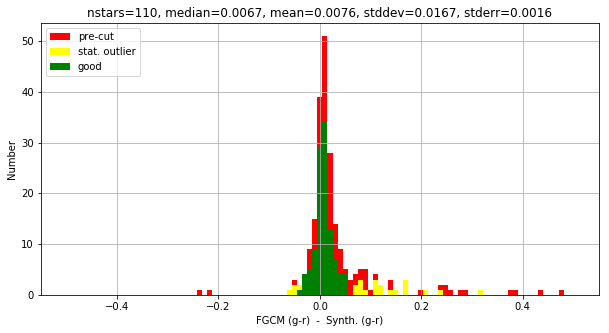

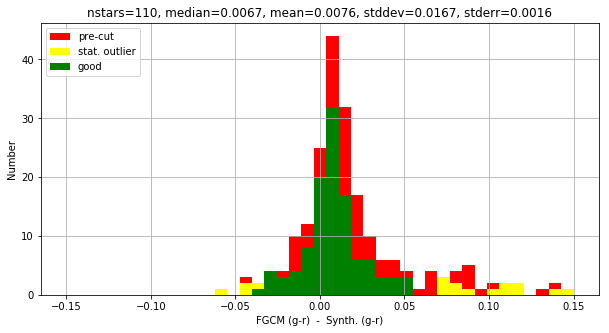

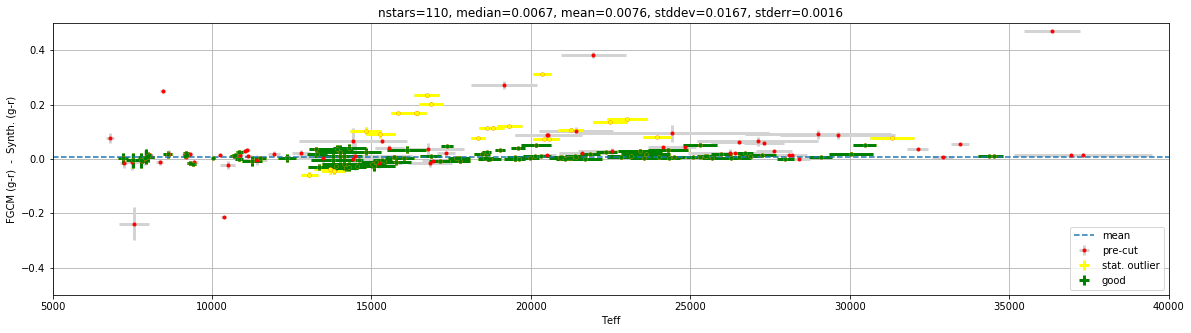

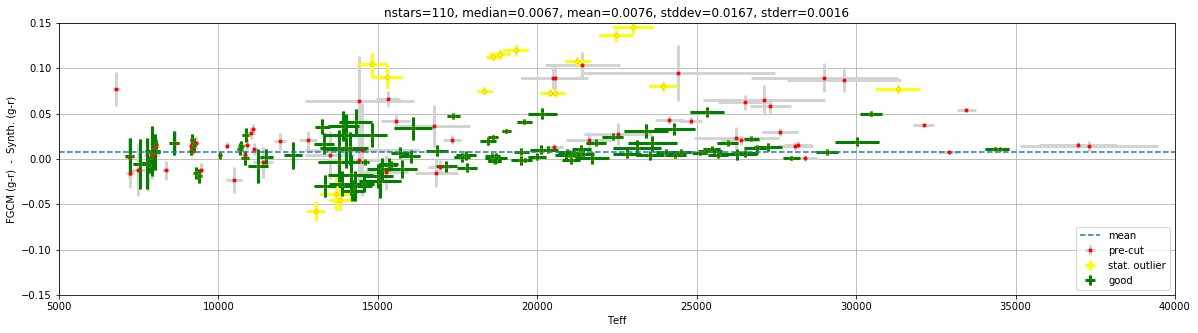

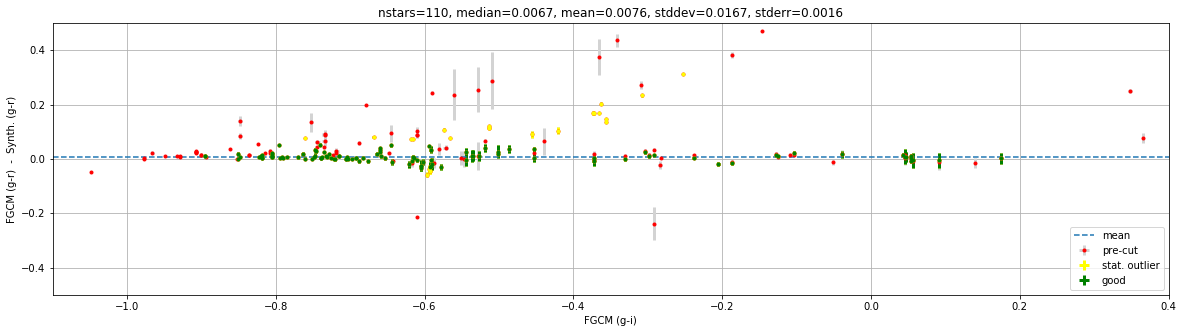

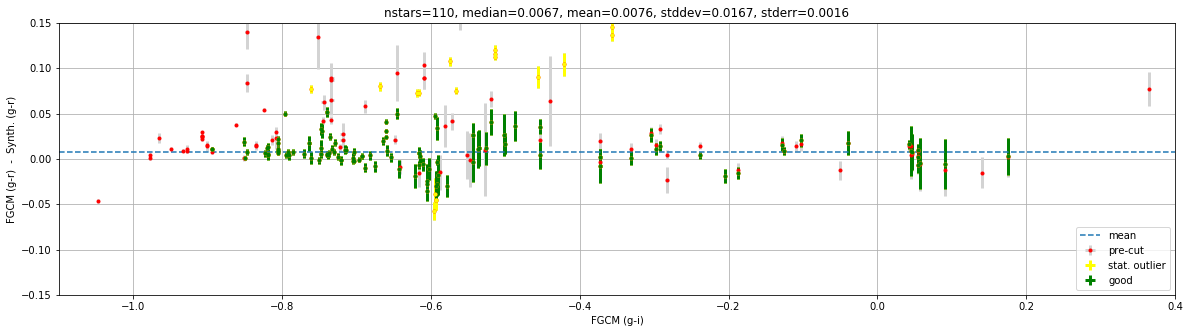

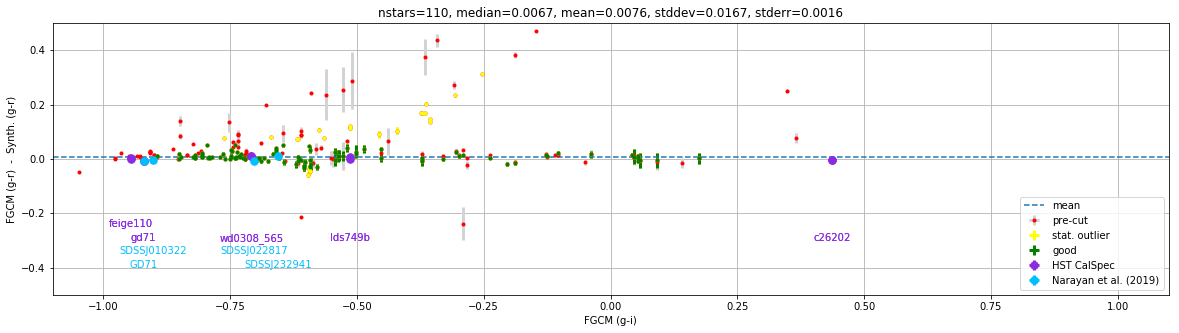

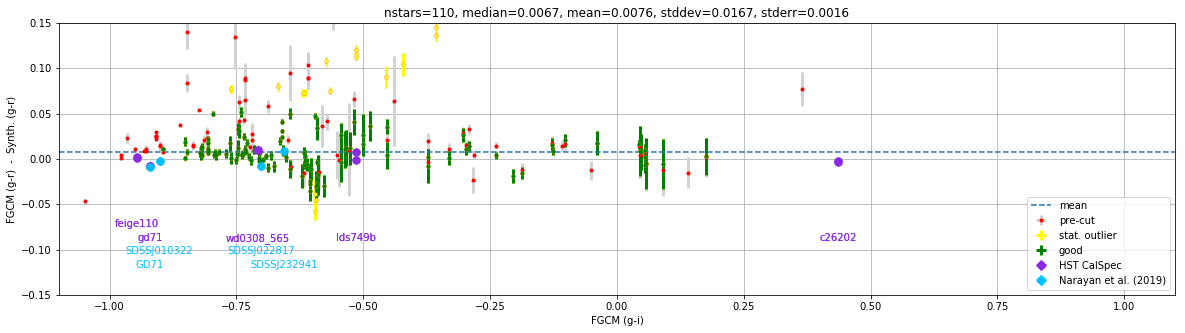

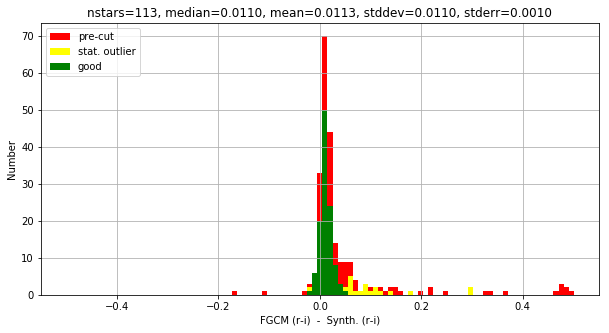

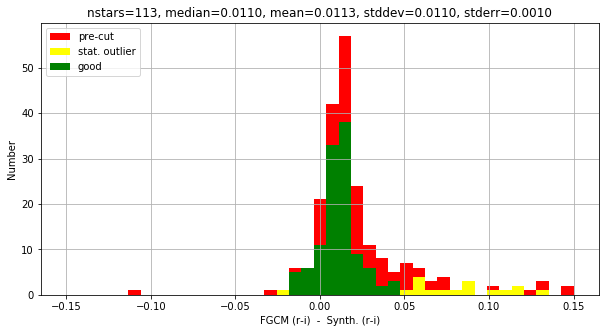

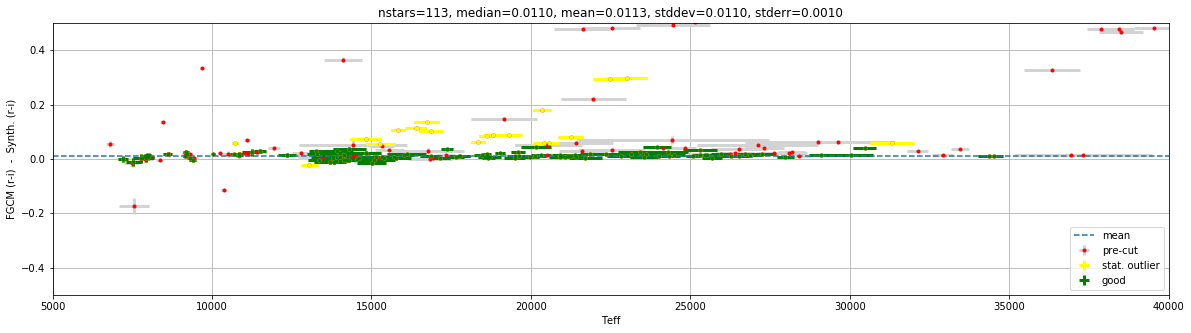

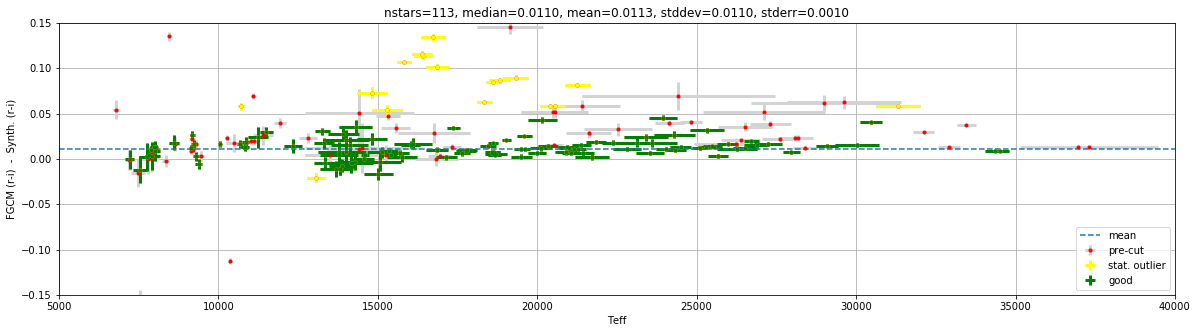

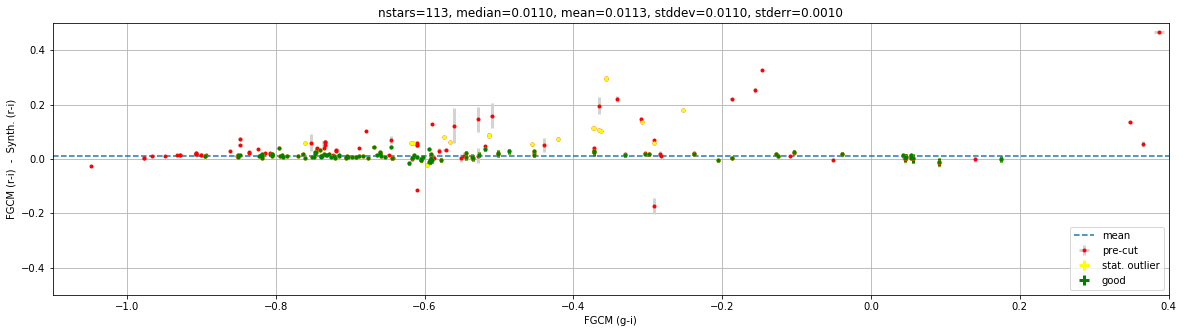

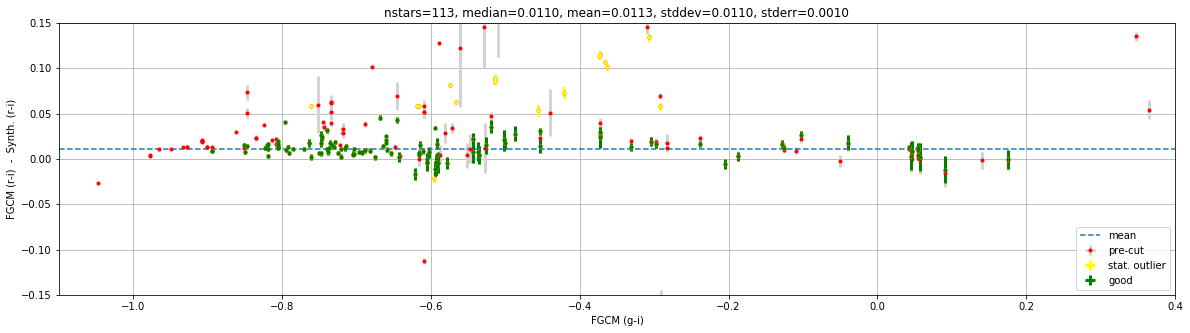

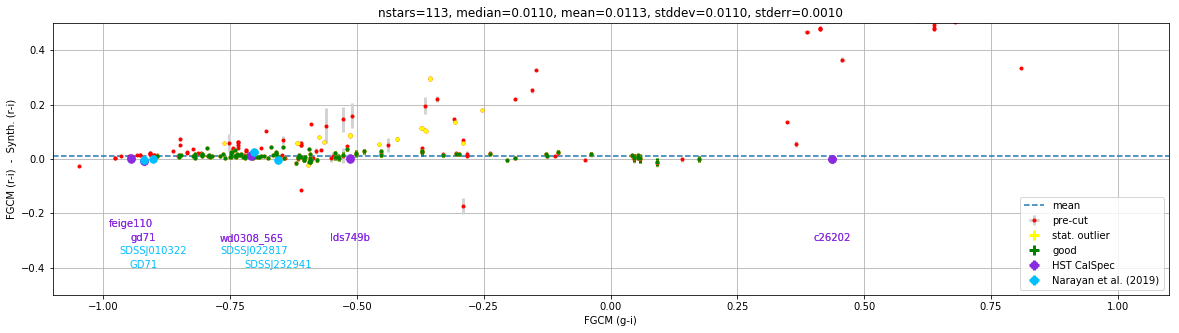

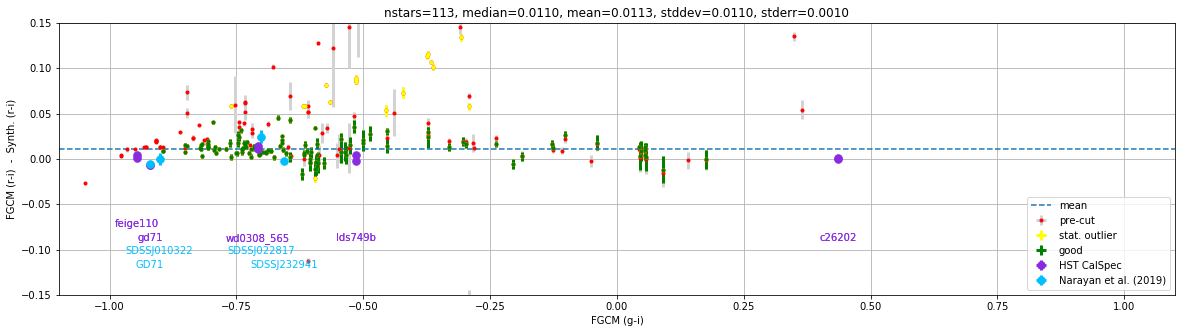

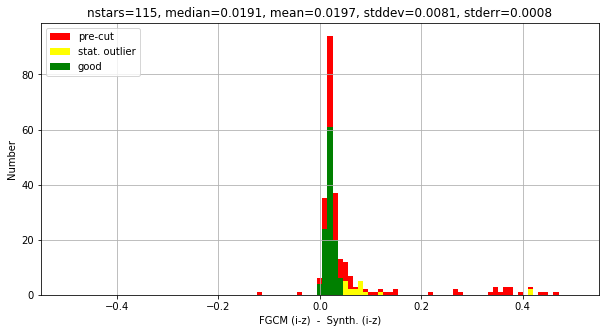

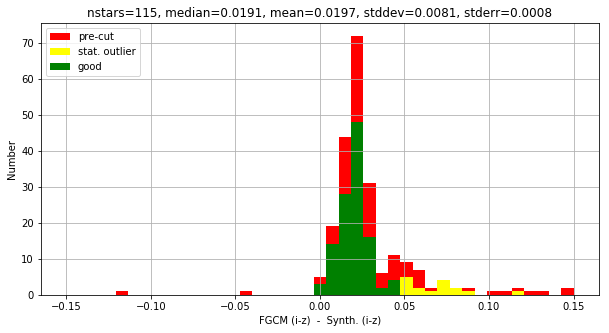

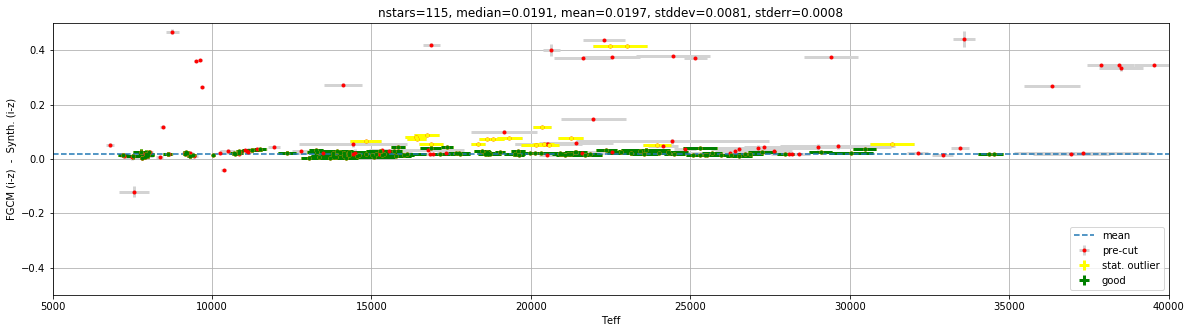

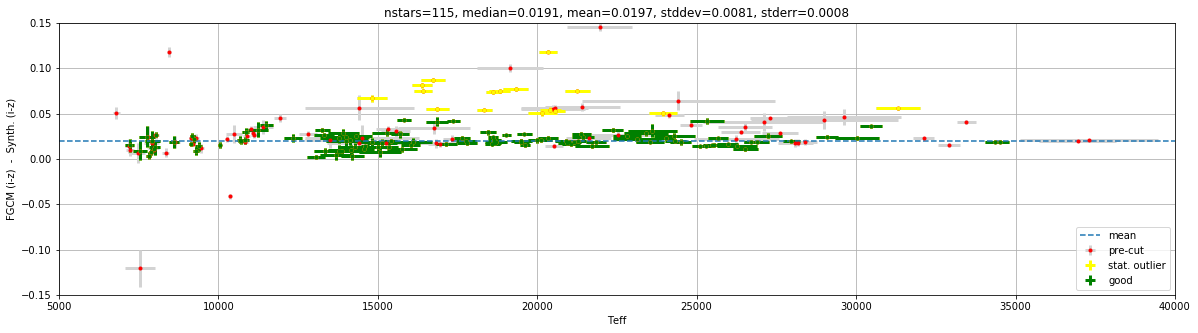

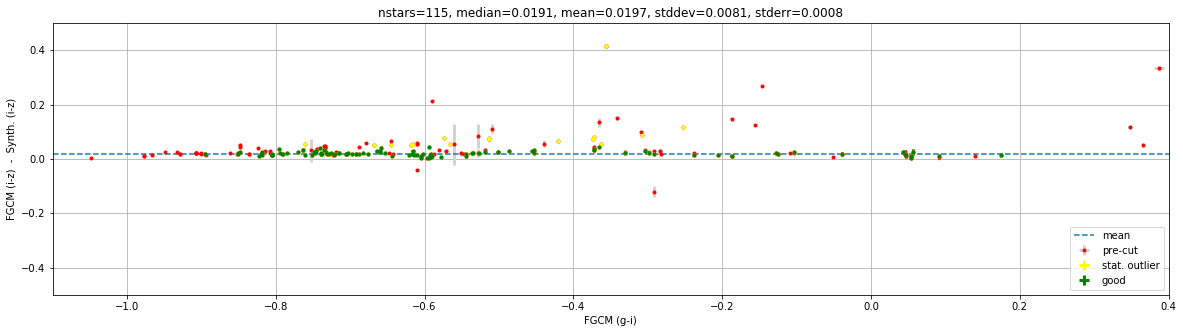

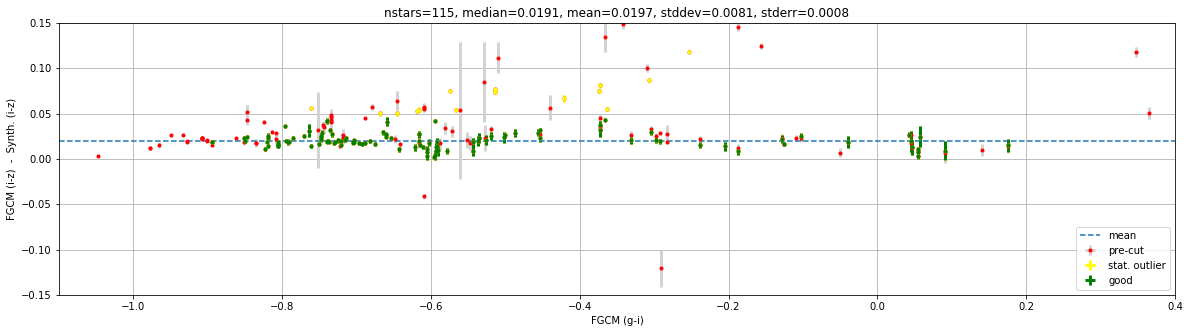

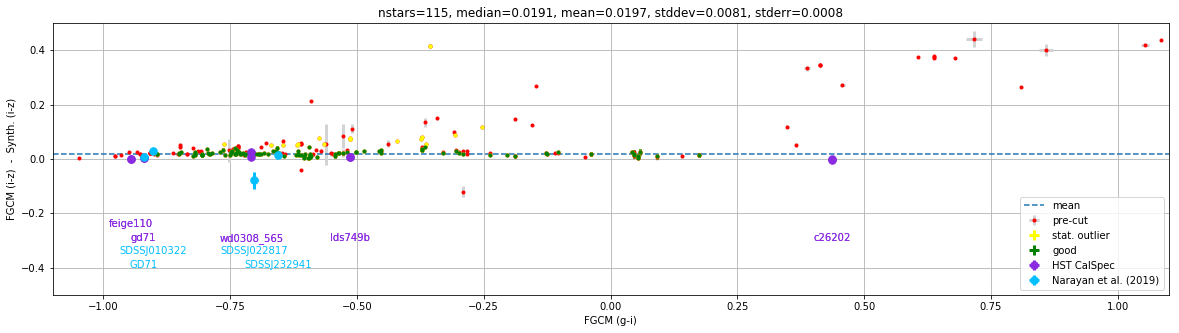

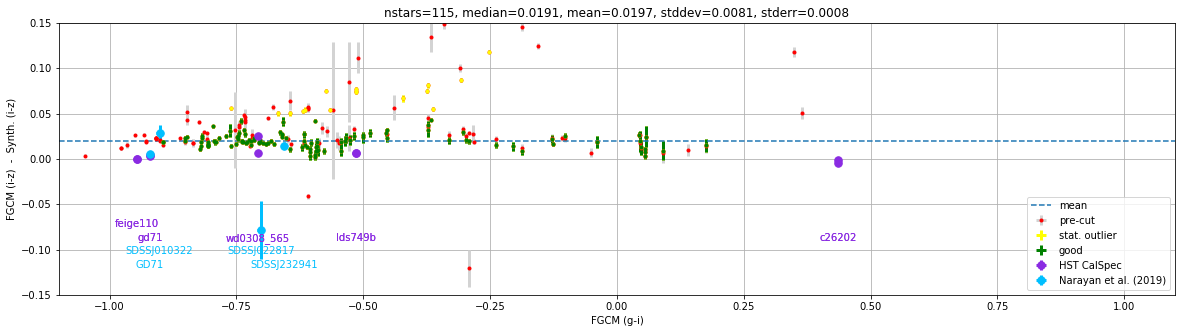

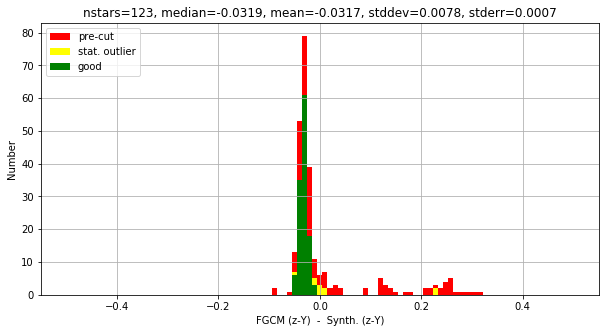

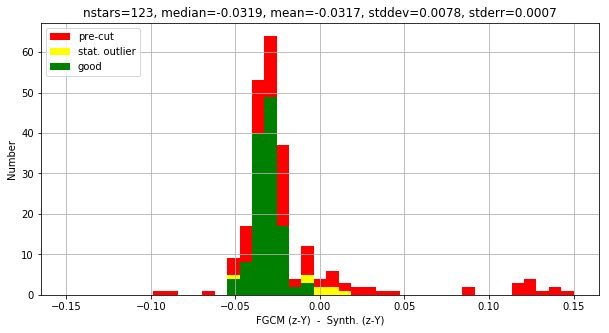

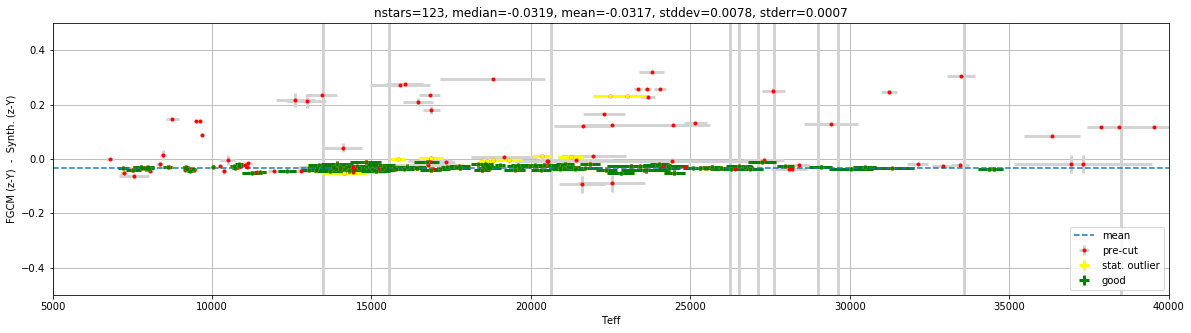

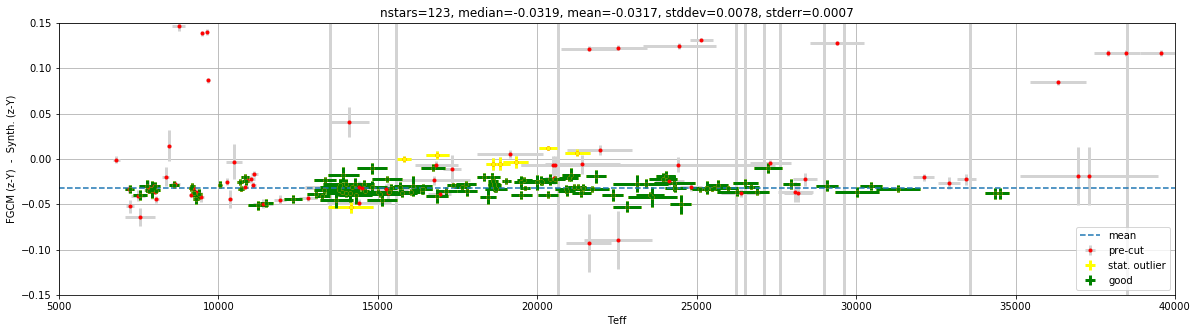

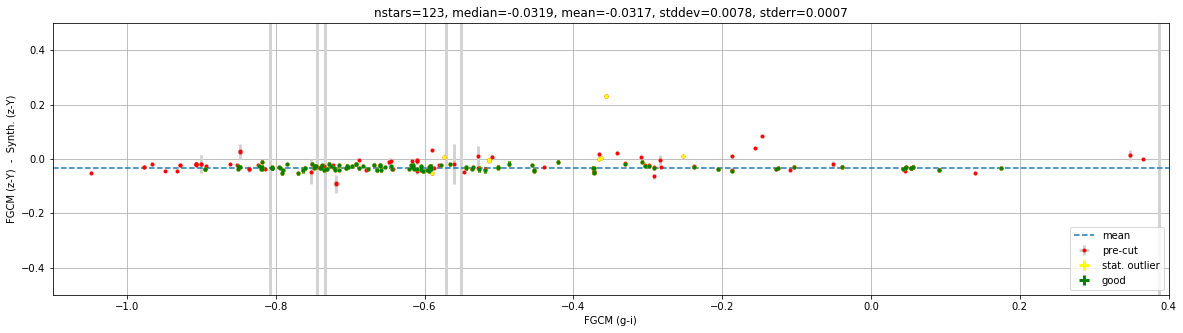

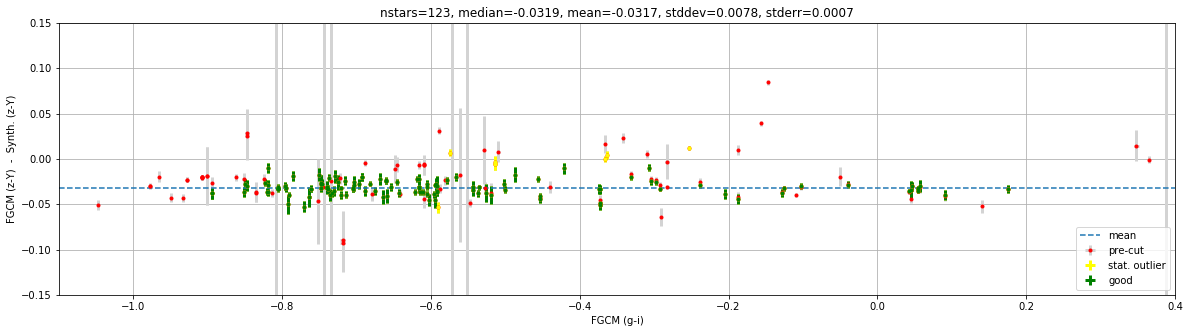

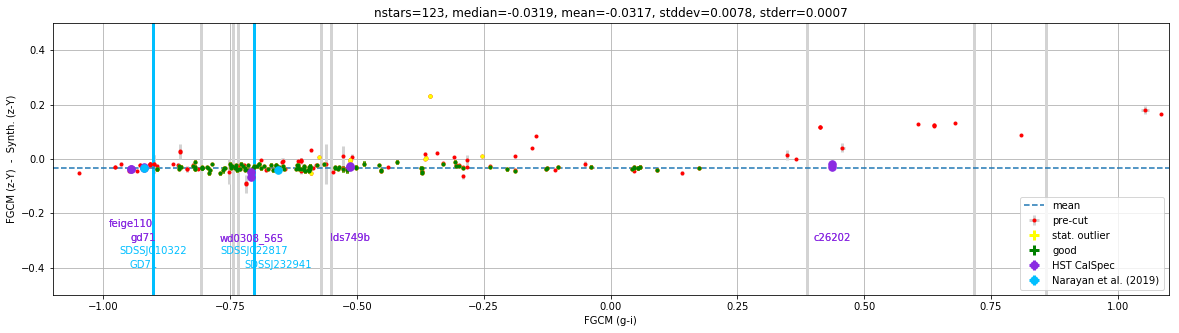

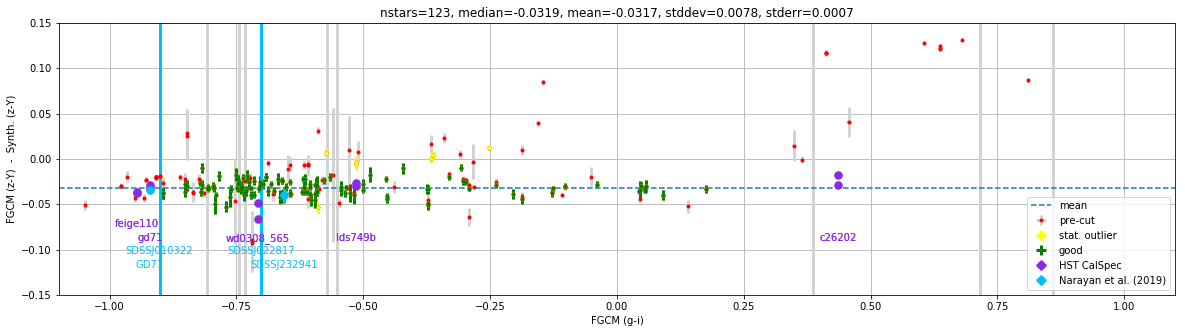

In [26]:
for i in range(len(deltaColor)):

    print 
    print deltaColor[i]
    
    column_x = deltaColor[i]
    xlabel = clabel[i]
    
    # Calculate quartiles, inter-quartile range, and IQR outlier limits
    q1,q2,q3 = data_df_clean[column_x].quantile([.25, .5, .75])
    iqr = q3 - q1
    qlo = q1 - 1.5*iqr
    qhi = q3 + 1.5*iqr
    #print q1, q2, q3, iqr, qlo, qhi
    
    # Mask out data that fall outside the IQR outlier limits...
    mask = ( (data_df_clean[column_x] >= qlo) & (data_df_clean[column_x] <= qhi) )
    data_df_cleaner = data_df_clean[mask]
    
    # Calculate AB color offset statistics for this color index...
    nrows =   data_df_cleaner[column_x].size
    xmedian = np.median(data_df_cleaner[column_x])
    xmean =   np.mean(data_df_cleaner[column_x])
    xstd =    np.std(data_df_cleaner[column_x])
    xerr =    xstd/math.sqrt(nrows-1)
    #print """%d   %.4f   %.4f   %.4f   %.4f""" % ( nrows, xmedian, xmean, xstd, xerr )
    
    title="""nstars=%d, median=%.4f, mean=%.4f, stddev=%.4f, stderr=%.4f""" % \
        ( nrows, xmedian, xmean, xstd, xerr )
    print title
    
    # Plot the histogram of results...
    fig, ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(10)
    status = histPlotCompare3(data_df, data_df_clean, data_df_cleaner, column_x, title, xlabel, -0.50, 0.50, 101)
    outputFile = """plot.%s.hist.%s.png""" %(inputFileBaseName, colorName[i])
    plt.savefig(outputFile)
    
    # Plot zoomed-in histogram of results...
    fig, ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(10)
    status = histPlotCompare3(data_df, data_df_clean, data_df_cleaner, column_x, title, xlabel, -0.15, 0.15, 41)
    outputFile = """plot.%s.hist_zoom.%s.png""" %(inputFileBaseName, colorName[i])
    plt.savefig(outputFile)
    
    # Plot delta_colors vs. Teff...
    column_x = 'Teff'
    column_xerr = 'errT'
    xlabel = 'Teff'

    column_y = deltaColor[i]
    column_yerr = errDeltaColor[i]
    ylabel = clabel[i]
    
    fig, ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(20)
    status = xyPlotCompare3(data_df, data_df_clean, data_df_cleaner, 
                       column_x, column_y, column_xerr, column_yerr, 
                       title, xlabel, ylabel, 5000., 40000., -0.50, +0.50, xmean)
    outputFile = """plot.%s.dcolor_vs_Teff.%s.png""" %(inputFileBaseName, colorName[i])
    plt.savefig(outputFile)
    
    # Plot delta_colors vs. Teff (zoomed-in)...
    fig, ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(20)
    status = xyPlotCompare3(data_df, data_df_clean, data_df_cleaner, 
                       column_x, column_y, column_xerr, column_yerr, 
                       title, xlabel, ylabel, 5000., 40000., -0.15, +0.15, xmean)
    outputFile = """plot.%s.dcolor_vs_Teff_zoom.%s.png""" %(inputFileBaseName, colorName[i])
    plt.savefig(outputFile)


    # Plot delta_colors vs. FGCM (g-i)...
    column_x = 'gi_std'
    column_xerr = 'gi_std_err'
    xlabel = 'FGCM (g-i)'

    fig, ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(20)
    status = xyPlotCompare3(data_df, data_df_clean, data_df_cleaner, 
                       column_x, column_y, column_xerr, column_yerr, 
                       title, xlabel, ylabel, -1.1, 0.4, -0.50, +0.50, xmean)
    outputFile = """plot.%s.dcolor_vs_gi.%s.png""" %(inputFileBaseName, colorName[i])
    plt.savefig(outputFile)
 
    # Plot delta_colors vs. FGCM (g-i) (zoomed-in)...
    fig, ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(20)
    status = xyPlotCompare3(data_df, data_df_clean, data_df_cleaner, 
                       column_x, column_y, column_xerr, column_yerr, 
                       title, xlabel, ylabel, -1.1, 0.4, -0.15, +0.15, xmean)
    outputFile = """plot.%s.dcolor_vs_gi_zoom.%s.png""" %(inputFileBaseName, colorName[i])
    plt.savefig(outputFile)
 
    # Plot delta_colors vs. FGCM (g-i), also overplotting results 
    # from HST CalSpec standards and Narayan et al. (2019) DAWDs...
    fig, ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(20)
    status = xyPlotCompare3(data_df, data_df_clean, data_df_cleaner, 
                       column_x, column_y, column_xerr, column_yerr, 
                       title, xlabel, ylabel, -1.1, 1.1, -0.50, +0.50, xmean)
    status = xyPlotOverplotCalSpec(calspec_df, column_x, column_y, column_xerr, column_yerr, -0.50, +0.50)
    status = xyPlotOverplotNarayan(narayan_df, column_x, column_y, column_xerr, column_yerr, -0.50, +0.50)
    outputFile = """plot.%s.dcolor_vs_gi.calspec_narayan.%s.png""" %(inputFileBaseName, colorName[i])
    plt.savefig(outputFile)
 
    # Plot delta_colors vs. FGCM (g-i), also overplotting results 
    # from HST CalSpec standards and Narayan et al. (2019) DAWDs (zoomed-in)...
    fig, ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(20)
    status = xyPlotCompare3(data_df, data_df_clean, data_df_cleaner, 
                       column_x, column_y, column_xerr, column_yerr, 
                       title, xlabel, ylabel, -1.1, 1.1, -0.15, +0.15, xmean)
    status = xyPlotOverplotCalSpec(calspec_df, column_x, column_y, column_xerr, column_yerr, -0.15, +0.15)
    status = xyPlotOverplotNarayan(narayan_df, column_x, column_y, column_xerr, column_yerr, -0.15, +0.15)
    outputFile = """plot.%s.dcolor_vs_gi_zoom.calspec_narayan.%s.png""" %(inputFileBaseName, colorName[i])
    plt.savefig(outputFile)
 